## Simulated Annealing


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
lablam=230 #labor cost in Rs
acclam=150 # accessories cost in Rs
transplam=540 # transportation cost in Rs

In [3]:
n=10000

In [4]:
sim=1000

In [5]:
def loss_function(lab_val,acc_val,transp_val):
    obj_func_min=0.3*lab_val+0.25*acc_val+0.45*transp_val
    return(obj_func_min)

In [6]:
import math
def sigmoid(e,t):
    return 1/(1+math.exp(-e/t))

In [8]:
sim_succ=[]
for i in range(sim):
    lab_cost=np.random.poisson(lablam,n)
    acc_cost=np.random.poisson(acclam,n)
    transp_cost=np.random.poisson(transplam,n)
    temp=1000
    best_ind=np.random.randint(0,n)
    e_best=loss_function(lab_cost[best_ind],acc_cost[best_ind],transp_cost[best_ind])
    curr_ind=best_ind
    curr_e=e_best
    e_val=list()
    prob_vec=[]
    e_val.append(e_best)
    while temp>1:
        if curr_ind<(n-1):
            new_index= curr_ind+1
        else:
            new_index=curr_ind-1

        e_new=loss_function(lab_cost[new_index],acc_cost[new_index],transp_cost[new_index])
        del_e=e_best-e_new
        if del_e>=0:
            e_best,best_ind=e_new,new_index
        else:
            prob=sigmoid(del_e,temp)
            prob_vec.append(prob)
            rand_numb=np.random.uniform(size=1)
            diff=curr_e-e_new
            if diff<0 or rand_numb<prob:
                curr_ind,curr_e= new_index,e_new
        e_val.append(e_best)
        temp-=1
    min_loss=[]
    for i in range(n):
        loss=loss_function(lab_cost[i],acc_cost[i],transp_cost[i])
        min_loss.append(loss)
    if min(min_loss)==min(e_val):
        sim_succ.append(1)
    else:
        sim_succ.append(0)

In [9]:
e_val[-1] # minimum value of the objective function

348.8

In [10]:
sum(sim_succ)/len(sim_succ)

0.002

Text(0.5, 1.0, 'Objective function value over iterations')

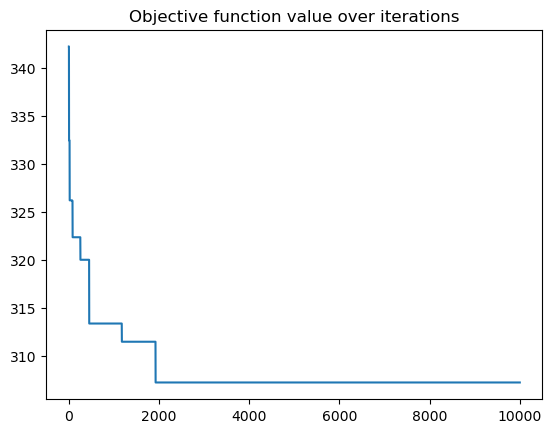

In [ ]:
plt.plot(e_val)
plt.title("Objective function value over iterations")

In [ ]:
# optimal values are
[lab_cost[best_ind],acc_cost[best_ind],transp_cost[best_ind]]

[222, 138, 458]

Text(0.5, 1.0, 'probability of randomizing the solution over iterations')

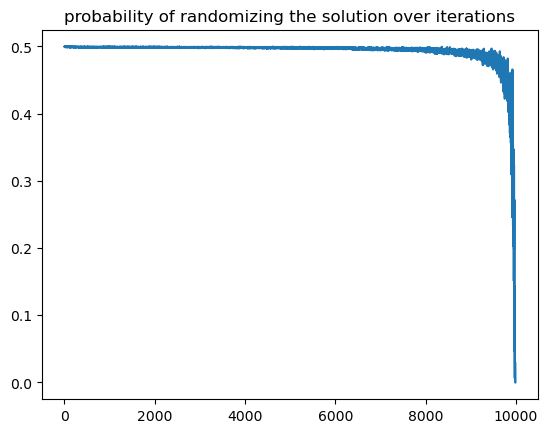

In [ ]:
plt.plot(prob_vec)
plt.title("probability of randomizing the solution over iterations")

In [11]:
# directly computing the minimum value
n=100
lab_cost=np.random.poisson(lablam,n)
acc_cost=np.random.poisson(acclam,n)
transp_cost=np.random.poisson(transplam,n)
min_loss=[]
for i in range(n):
    loss=loss_function(lab_cost[i],acc_cost[i],transp_cost[i])
    min_loss.append(loss)

In [ ]:
pd.Series(min_loss).min()==301.4

True

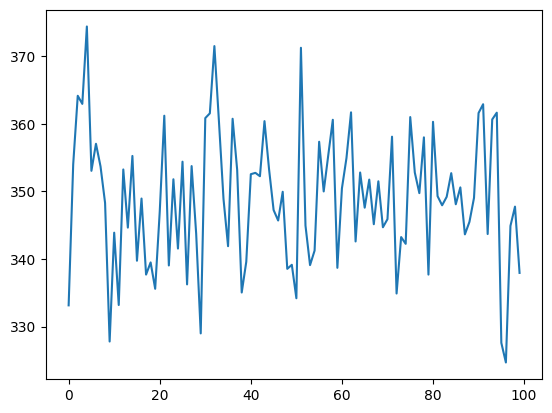

In [12]:
plt.plot(min_loss)